In [13]:
pip install panadas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement panadas (from versions: none)
ERROR: No matching distribution found for panadas

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel(r"C:\Users\Oscar_On\Downloads\Group Project Data-SFD Data-Toronto Police.xlsx")

In [17]:
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707,5707,5707.000000,5707,5707,5707.000000,5707.000000,...,5707,5707,5707.000000,5707.000000,5707.0,5707,5707.0,5707,5707.000000,5707.000000
unique,NaN,NaN,NaN,5707,3579,NaN,12,7,NaN,NaN,...,4,17,NaN,NaN,159.0,159,140.0,140,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,Evening,D31,NaN,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,604,995,NaN,NaN,...,2307,998,NaN,NaN,311.0,311,304.0,304,NaN,NaN
mean,-79.481115,43.244138,2854.000000,NaN,NaN,2014.460662,NaN,NaN,187.198178,15.901174,...,NaN,NaN,0.122481,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,NaN,NaN,5.468803,NaN,NaN,100.269326,8.819631,...,NaN,NaN,0.349599,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671
min,-85.488744,0.000000,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [19]:
# count the rows with missing value
df[df['HOOD_158']== "NSA"].count()

X                    64
Y                    64
OBJECTID             64
EVENT_UNIQUE_ID      64
OCC_DATE             64
OCC_YEAR             64
OCC_MONTH            64
OCC_DOW              64
OCC_DOY              64
OCC_DAY              64
OCC_HOUR             64
OCC_TIME_RANGE       64
DIVISION             64
DEATH                64
INJURIES             64
HOOD_158             64
NEIGHBOURHOOD_158    64
HOOD_140             64
NEIGHBOURHOOD_140    64
LONG_WGS84           64
LAT_WGS84            64
dtype: int64

In [20]:
# drop all the rows with missing values
df_clean = df.drop(df[df['HOOD_158']== "NSA"].index)

# reset all the index
df_clean.reset_index(drop=True, inplace=True)

# show df info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5643 non-null   float64
 1   Y                  5643 non-null   float64
 2   OBJECTID           5643 non-null   int64  
 3   EVENT_UNIQUE_ID    5643 non-null   object 
 4   OCC_DATE           5643 non-null   object 
 5   OCC_YEAR           5643 non-null   int64  
 6   OCC_MONTH          5643 non-null   object 
 7   OCC_DOW            5643 non-null   object 
 8   OCC_DOY            5643 non-null   int64  
 9   OCC_DAY            5643 non-null   int64  
 10  OCC_HOUR           5643 non-null   int64  
 11  OCC_TIME_RANGE     5643 non-null   object 
 12  DIVISION           5643 non-null   object 
 13  DEATH              5643 non-null   int64  
 14  INJURIES           5643 non-null   int64  
 15  HOOD_158           5643 non-null   object 
 16  NEIGHBOURHOOD_158  5643 

In [42]:
# combine death and injuries column
df_clean['Death or Injuries'] = df_clean['DEATH'] + df_clean['INJURIES']
df_clean

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,Death or Injuries
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,0
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,0
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,2
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,1
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,1
5639,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,2
5640,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,0
5641,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,2


In [43]:
df_clean.describe(include="all")

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,Death or Injuries
count,5643.000000,5643.000000,5643.000000,5643,5643,5643.000000,5643,5643,5643.000000,5643.000000,...,5643,5643.000000,5643.000000,5643.0,5643,5643.0,5643,5643.000000,5643.000000,5643.000000
unique,NaN,NaN,NaN,5643,3554,NaN,12,7,NaN,NaN,...,17,NaN,NaN,158.0,158,140.0,140,NaN,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,D31,NaN,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,599,990,NaN,NaN,...,992,NaN,NaN,311.0,311,304.0,304,NaN,NaN,NaN
mean,-79.415076,43.719079,2874.332624,NaN,NaN,2014.532164,NaN,NaN,187.136807,15.905369,...,NaN,0.122984,0.486443,NaN,NaN,NaN,NaN,-79.415076,43.719079,0.609428
std,0.116379,0.048917,1643.956540,NaN,NaN,5.448039,NaN,NaN,100.372513,8.824548,...,NaN,0.350381,0.781489,NaN,NaN,NaN,NaN,0.116379,0.048917,0.842548
min,-79.625565,43.587343,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.625565,43.587343,0.000000
25%,-79.512482,43.678879,1453.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.512482,43.678879,0.000000
50%,-79.438373,43.721312,2886.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.438373,43.721312,0.000000
75%,-79.327105,43.755510,4296.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.327105,43.755510,1.000000


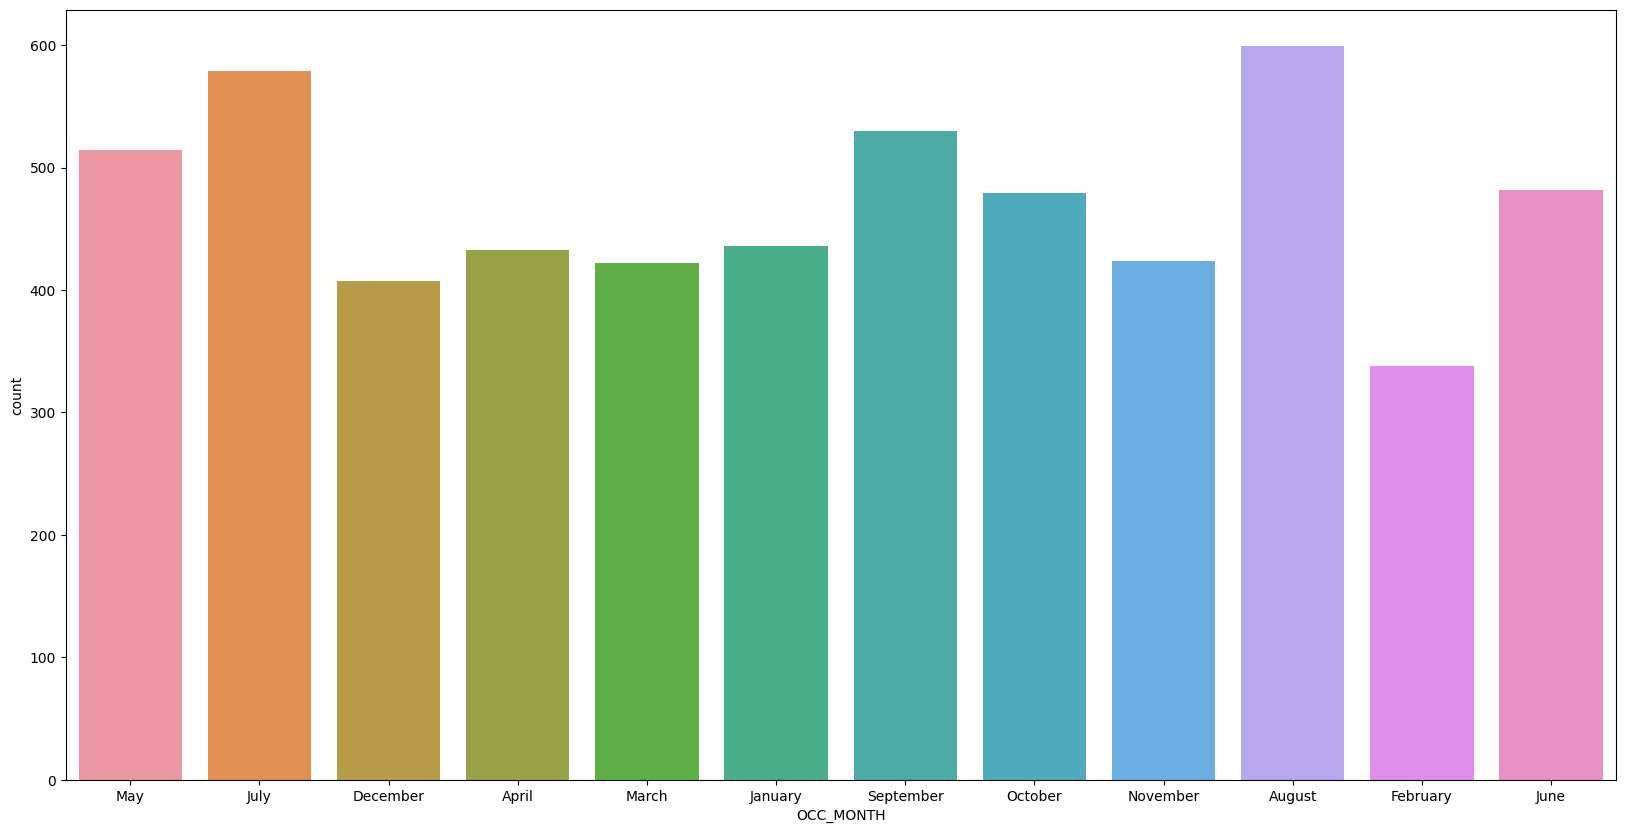

In [39]:
plt.figure(figsize=(20, 10))
sns.countplot(x='OCC_MONTH', data=df_clean)
plt.show()

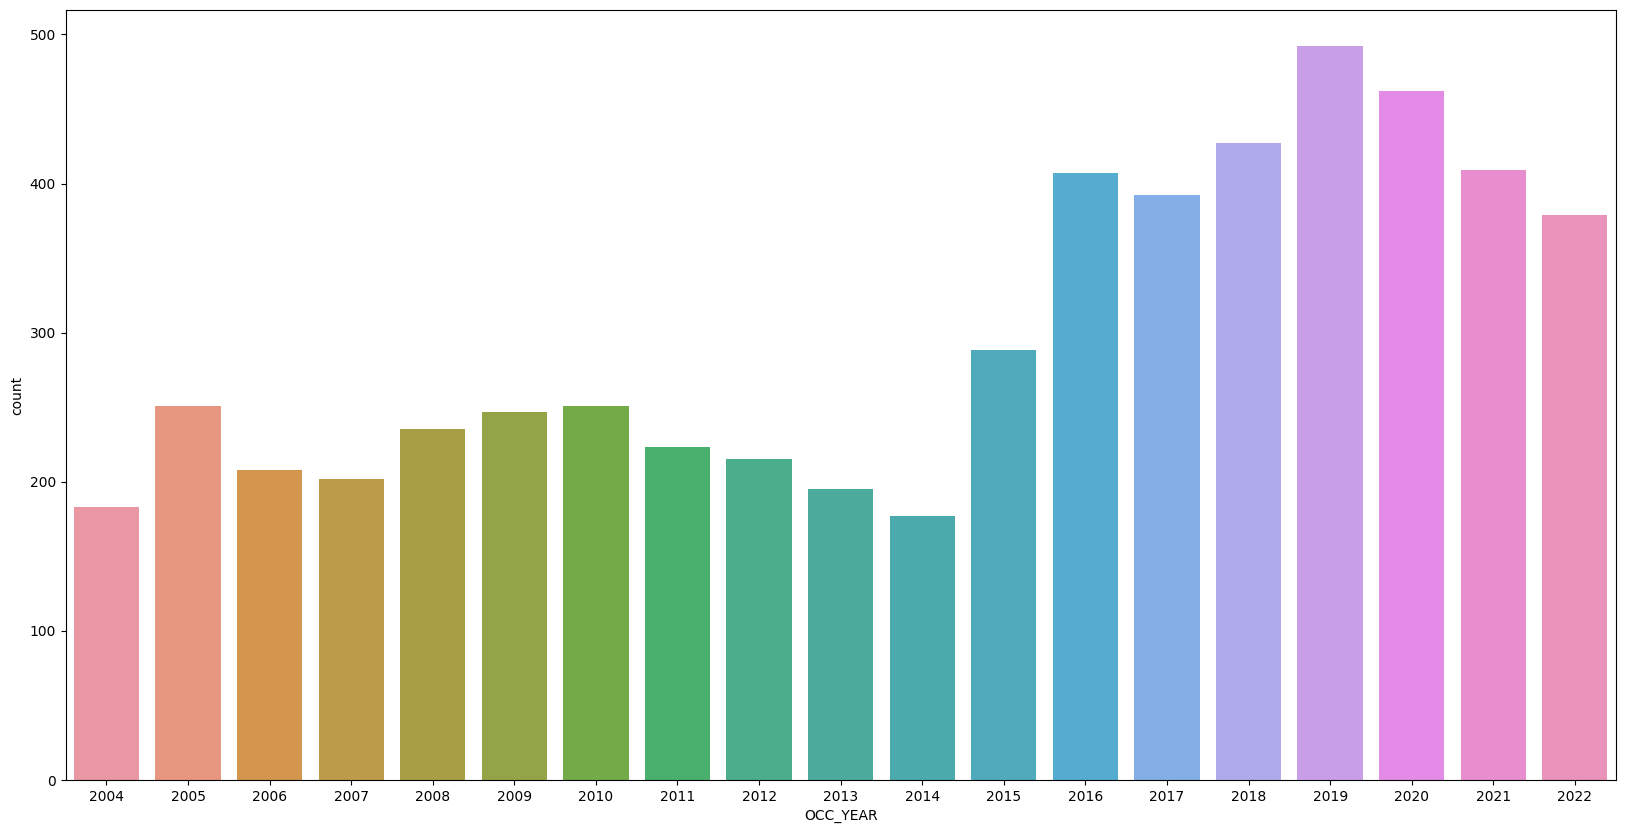

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(x='OCC_YEAR', data=df_clean)
plt.show()


<Axes: >

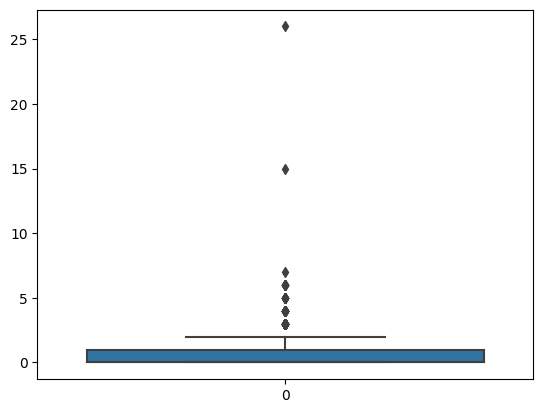

In [53]:
sns.boxplot(data=df_clean['Death or Injuries'])
